In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("//content/Algerian_forest_fires_cleaned_dataset.csv")

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.shape

(243, 15)

In [ ]:
#drop day,month,year columns wich is not necessary for model training
df.drop(["day","month","year"],axis=1,inplace=True)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
#encoding the column name classes from categorical to numerical
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [ ]:
# for undergoe model selection we need to split dependent and independent variables
X = df.drop("FWI",axis=1)
y = df["FWI"]

In [ ]:
#now we need to apply train_test_split for dividing taring and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print("the X_train values:",X_train.shape)
print("the X_test values:",X_test.shape)
print("the y_train values:",y_train.shape)
print("the y_test values:",y_test.shape)

the X_train values: (182, 11)
the X_test values: (61, 11)
the y_train values: (182,)
the y_test values: (61,)


In [ ]:
#lets check correlaition with respect to data
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

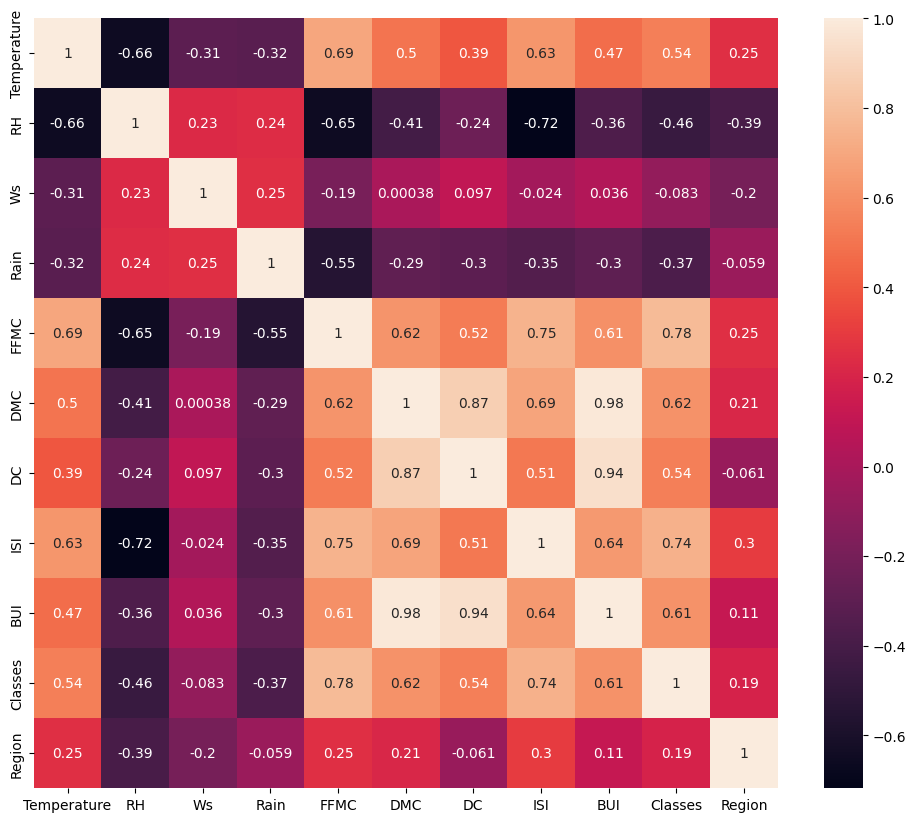

In [ ]:
#lets haave graphical representation for checking multicolinarlity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)


In [ ]:
#undergoing multicolinarity
def corelation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>threshold):
           colname = corr_matrix.columns[i]
           col_corr.add(colname)
  return col_corr


In [ ]:
corr_features = corelation(X_train,0.85)

In [ ]:
#drop features when corelation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [ ]:
#now we need to standardize the given  data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

BOX PLOT TO UNDERGO STANDARDIZING THE DATA

Text(0.5, 1.0, 'X_train After Scaling')

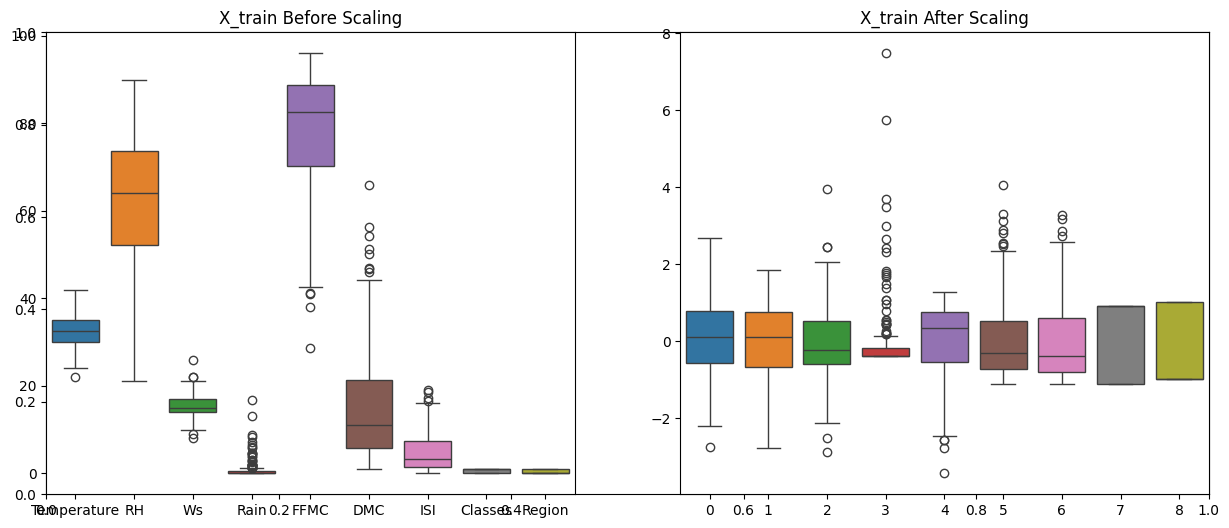

In [ ]:
plt.subplots(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("X_train Before Scaling")
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train After Scaling")

Linear Regression

the MAE: 0.5468236465249986
the r2_score: 0.9847657384266951


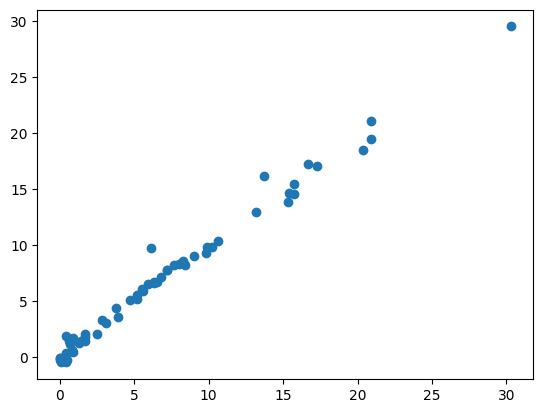

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
le  = LinearRegression()
le.fit(X_train_scaled,y_train)
y_pred = le.predict(X_test_scaled)
print("the MAE:",mean_absolute_error(y_test,y_pred))
print("the r2_score:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

Lassco Regression

the MAE: 1.133175994914409
the r2_score: 0.9492020263112388


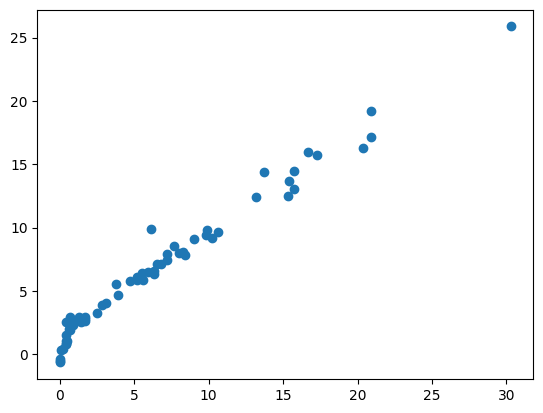

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso  = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
print("the MAE:",mean_absolute_error(y_test,y_pred))
print("the r2_score:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

the MAE is : 0.619970115826343
the r2_score is : 0.9820946715928275


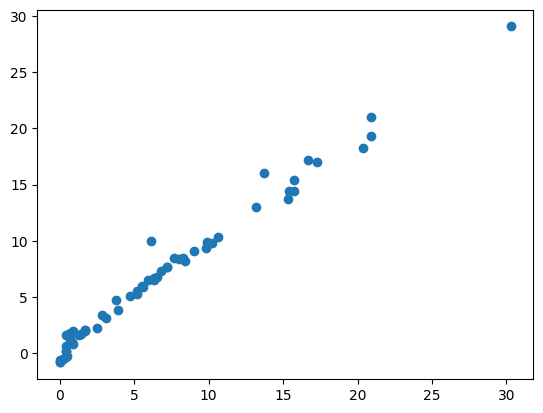

In [ ]:
#Hyper paramater tunning using cross validation
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,r2_score
lassocv = LassoCV()
lassocv.fit(X_train_scaled,y_train)
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
print("the MAE is :",mean_absolute_error(y_test,y_pred))
print("the r2_score is :",r2_score(y_test,y_pred))

#Ridge Regression Model

the MAE: 0.5642305340105692
the r2_score: 0.9842993364555513


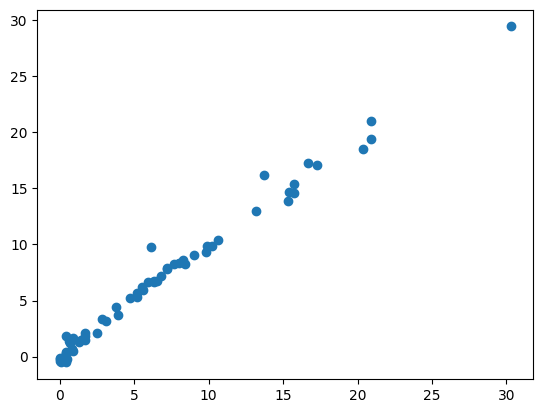

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Ridge  = Ridge()
Ridge.fit(X_train_scaled,y_train)
y_pred = Ridge.predict(X_test_scaled)
print("the MAE:",mean_absolute_error(y_test,y_pred))
print("the r2_score:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

the MAE is : 0.5642305340107913
the r2_score is : 0.9842993364555519


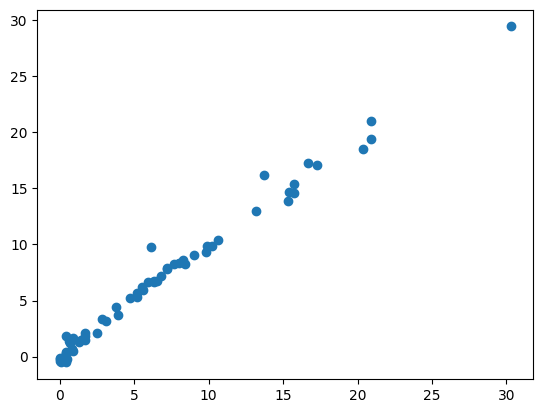

In [ ]:
#Hyper paramater tunning using cross validation
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,r2_score
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
print("the MAE is :",mean_absolute_error(y_test,y_pred))
print("the r2_score is :",r2_score(y_test,y_pred))

#Elastic Net Regression Model

the MAE: 1.8822353634896005
the r2_score: 0.8753460589519703


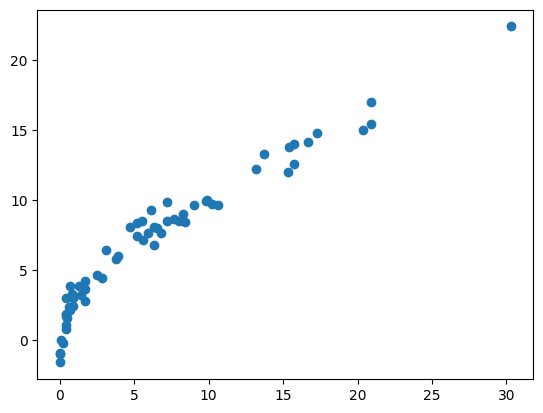

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ElasticNet  = ElasticNet()
ElasticNet.fit(X_train_scaled,y_train)
y_pred = ElasticNet.predict(X_test_scaled)
print("the MAE:",mean_absolute_error(y_test,y_pred))
print("the r2_score:",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

the MAE is : 0.6575946731430898
the r2_score is : 0.9814217587854941


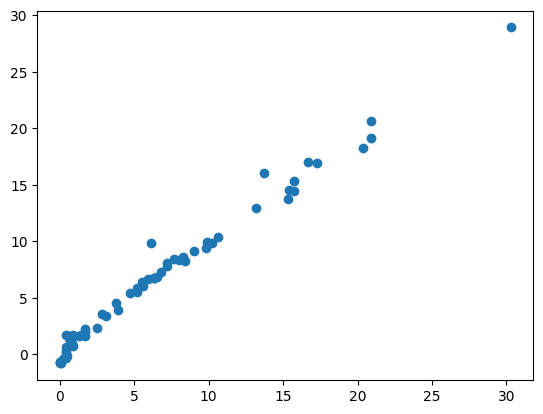

In [ ]:
#Hyper paramater tunning using cross validation
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,r2_score
elsasticnetcv = ElasticNetCV()
elsasticnetcv.fit(X_train_scaled,y_train)
y_pred = elsasticnetcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
print("the MAE is :",mean_absolute_error(y_test,y_pred))
print("the r2_score is :",r2_score(y_test,y_pred))

#Pickle the Machine Learning Model and preprocessing model Standard sclaler

In [ ]:
sc

StandardScaler()

In [ ]:
Ridge

Ridge()

In [ ]:
import pickle
pickle.dump(sc,open("scaler.pkl",'wb'))
pickle.dump(Ridge,open("Ridge.pkl",'wb'))